# Important Discrete RVs -- Interactive widget to explore the different shapes of the Poisson PMF

Run the cell below. Then use the slider to change the value of alpha and observe the effect on the shape of the PMF. 

We specify the values that the random variable will take on by specifying `low` and `high` values. As in most Python functions, the actual values that the random variable will take on will not include `high`; the actual highest value is `high - 1`.

Now let's see how to create and work with the discrete uniform distribution in Python.

We will use an object-oriented (OO) approach in working with distributions in `scipy.stats`; however, you will not need to have any background in OO programming to understand this. Basically, we will create an object with the desired distribution by calling the specified `scipy.stats` random variable type with the desired distribution parameters as the argument, and we will assign the output to a variable. 

So, to create a random variable that represents the value on the top face when rolling a fair 6-sided die. It is convention to use $U$ for such a random variable if that does not conflict with other random variables' names. In Python, we can create an object to model this random variable like:

In [4]:
U = stats.randint(1, 7)

Alternatively, we can pass `low` and `high` as keyword parameters if we want to be more explicit:

In [5]:
U = stats.randint(low=1, high=7)

U is an *object*, and it has *methods* to work with the discrete uniform random variable with the given parameters. **Methods are just like functions, except that they belong to an object, and their behavior is affected by the internal attributes (i.e., properties) of the object.**

For instance, when we created `U`, we set its attributes were set to generate a values from 1 to 6 (inclusive).  You can use Python's help function to see the methods of `U`:

In [6]:
help(U)

Help on rv_discrete_frozen in module scipy.stats._distn_infrastructure object:

class rv_discrete_frozen(rv_frozen)
 |  rv_discrete_frozen(dist, *args, **kwds)
 |  
 |  Method resolution order:
 |      rv_discrete_frozen
 |      rv_frozen
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  logpmf(self, k)
 |  
 |  pmf(self, k)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from rv_frozen:
 |  
 |  __init__(self, dist, *args, **kwds)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cdf(self, x)
 |  
 |  entropy(self)
 |  
 |  expect(self, func=None, lb=None, ub=None, conditional=False, **kwds)
 |  
 |  interval(self, confidence=None, **kwds)
 |  
 |  isf(self, q)
 |  
 |  logcdf(self, x)
 |  
 |  logsf(self, x)
 |  
 |  mean(self)
 |  
 |  median(self)
 |  
 |  moment(self, order=None, **kwds)
 |  
 |  ppf(self, q)
 |  
 |  rvs(self, size=None, random_state=None)
 |  
 |  sf(self, x)
 |  
 

A few of these should look familiar: pmf, cdf, and sf refer to the same functions that we abbreviated in {doc}`discrete-rvs` and {doc}`cdfs`: the probability mass function, cumulative distribution function, and survival function, respectively. Each of the methods can be called by adding it to the object name after a period, followed by parentheses. Any parameters or values for the method should be given in the parentheses. 

We can get the interval containing the range of a random variable in `scipy.stats` using the support method:

In [7]:
U.support()

(1, 6)

```{warning}

Note that `support` returns the lowest value in the range and the highest value in the range, so be careful in using this method. If these values were used as arguments to create a new `stats.randint` object, that object would have a different range!  
```

We can evaluate the PMF at any value:

In [8]:
U.pmf(3)

0.16666666666666666

Note that these methods can also take lists or vectors as their arguments:

In [9]:
uvals = np.arange(1, 7)
U.pmf(uvals)

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

Let's plot the PMF for this random variable:

/var/folders/gz/d_8lq2wn23x2lmhfh63cfl3400010v/T/ipykernel_35713/2331808516.py:1: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(uvals, U.pmf(uvals), use_line_collection=True)


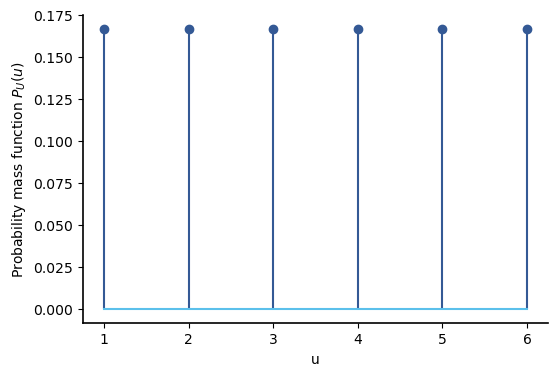

In [10]:
plt.stem(uvals, U.pmf(uvals), use_line_collection=True)
plt.xlabel("u")
plt.ylabel("Probability mass function $P_U(u)$");

We can use the `rvs` method to draw random values from this random variable. The argument is the number of random values to generate:

In [11]:
num_sims = 10_000
u = U.rvs(num_sims)
print(u[:20])

[6 1 5 3 5 4 6 6 2 1 5 3 5 4 3 3 4 6 2 5]


Let's use `plt.hist` to see if the relative frequencies are approximately equal:

(array([1614.,    0., 1650.,    0., 1677.,    0., 1704.,    0., 1661.,
        1694.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

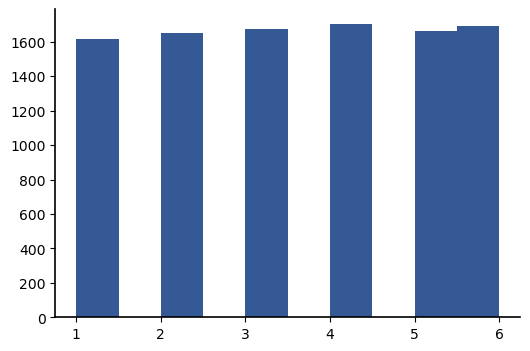

In [12]:
plt.hist(u)

The look to have equal counts but have a strange spacing. That is because `plt.hist()` by default has 10 bins, whereas the data only takes on 6 values. We will get much better results if we specify the bins. For discrete random variables with a contiguous set of integer values, specifying the number of bins may work out:

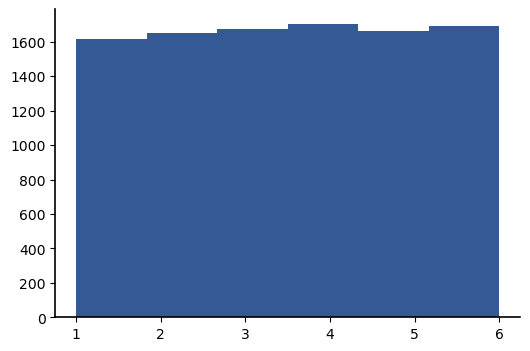

In [13]:
counts, mybins, patches = plt.hist(u, bins=6)

However, look at the set of bin edges returned: 

In [14]:
print(mybins)

[1.         1.83333333 2.66666667 3.5        4.33333333 5.16666667
 6.        ]


In general, it is safest to specify the exact bin edges to use. But again, we must be careful in dealing with the upper value, and this time doubly so. When providing a list of bin edges, they `plt.hist` interprets them as follows:

       **bins** : *array* 
            The edges of the bins. Length nbins + 1 (nbins left edges and right edge of last bin). 
            
For the last bin, we need to provide the value 6 as the left edge, and we need to provide another higher value (say, 7) as the right edge. Since a `range` or `np.arange` does not include its last value, we will need to specify a value 1 higher than 7:

In [15]:
newbins = range(1, 8)
list(newbins)

[1, 2, 3, 4, 5, 6, 7]

(array([1614., 1650., 1677., 1704., 1661., 1694.]),
 array([1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 6 artists>)

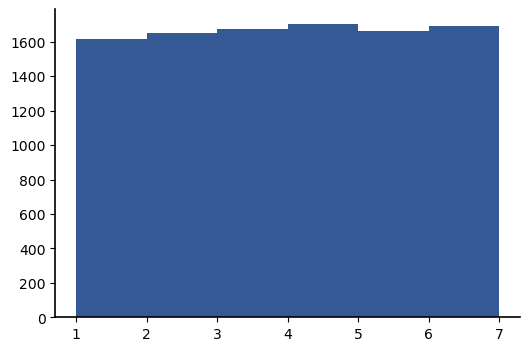

In [16]:
plt.hist(u, bins=newbins)

When working with discrete random variables, we can get the relative frequencies from `plt.hist()` by passing the `density=True` keyword argument, **provided the random variable is defined on the integers and bins of length 1 are used**.

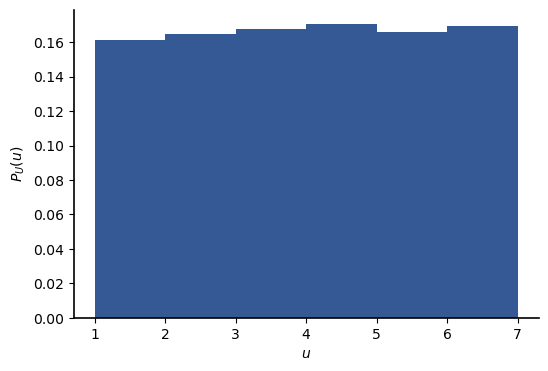

In [17]:
plt.hist(u, bins=newbins, density=True)
plt.xlabel("$u$")
plt.ylabel("$P_U(u)$");

As expected, the relative frequencies match the PMF values closely.

Next, we plot the CDF. Since the CDF takes on nonzero values in between the values the random variable takes on, we will plot it for a finer mesh of $u$ values:

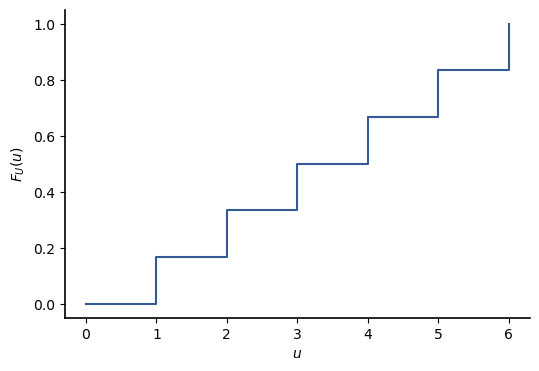

In [18]:
uvals2 = np.linspace(0, 6, 61)
plt.step(uvals2, U.cdf(uvals2), where="post")

plt.xlabel("$u$")
plt.ylabel("$F_U(u)$");

Finally, let's compare the cumulative histogram (with both `cumulative = True` and `density = True`) to the CDF:

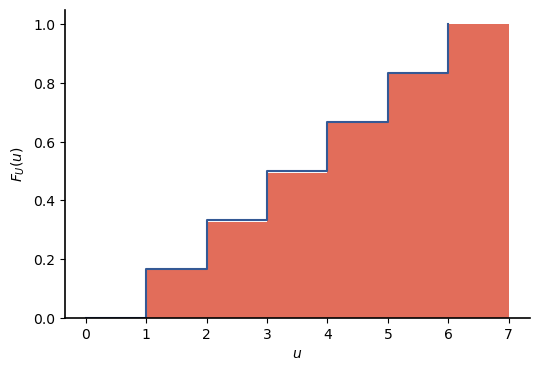

In [19]:
uvals2 = np.linspace(0, 6, 61)
plt.step(uvals2, U.cdf(uvals2), where="post")
plt.hist(u, cumulative=True, density=True, bins=newbins)

plt.xlabel("$u$")
plt.ylabel("$F_U(u)$");

**Exercise:** What happens if we plot the cumulative histogram without specifying the bins? Why do you think that happens?

In [10]:
import scipy.stats as stats
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import ipywidgets as widgets
from ipywidgets import interact

pvals = np.arange(0, 11)


def plot_poisson_pmf(alpha):
    plt.clf()
    plt.stem(pvals, stats.poisson.pmf(pvals, mu=alpha))
    plt.show()


interact(
    plot_poisson_pmf,
    alpha=widgets.FloatSlider(
        min=0.2,
        max=5.1,
        step=0.2,
        value=1,
        description="alpha",
        style={"description_width": "initial"},
    ),
);

interactive(children=(FloatSlider(value=1.0, description='alpha', max=5.1, min=0.2, step=0.2, style=SliderStyl…